In [1]:
from blockdiagrams import DiagramBuilder

db = DiagramBuilder(block_length=1, fontsize=16)

# Diagram drawing
db.add("x(t)", kind="input")
db.add("h_{aa}(t)", kind="block")
db.add("x_c(t)", kind="arrow")
db.add("mult", kind="combiner", input_text="p(t)", operation='mult', input_side='bottom')
db.add("x_p(t)", kind="arrow")
db.add("C/D", kind="block", input_text="T_s", input_side='bottom')
db.add("x_d[n]", kind="arrow")
db.add("D/C", kind="block")
db.add("x_p(t)", kind="arrow")
db.add("h_r(t)", kind="block")
db.add("x_r(t)", kind="output")

#db.show()
db.show(savepath = "diag1.png")

ModuleNotFoundError: No module named 'blockdiagrams'

Saved in: diag2.png


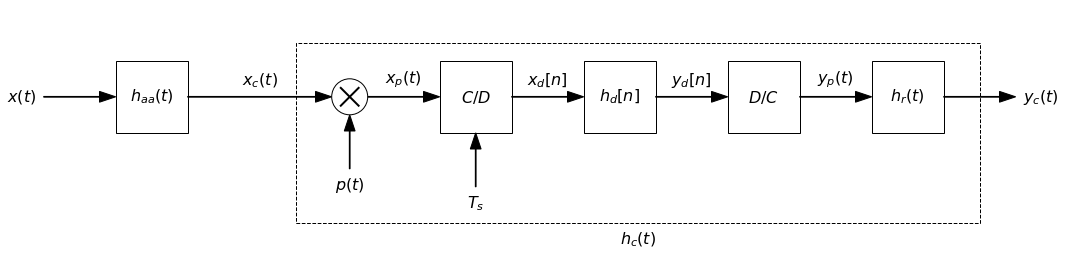

In [ ]:
from blockdiagrams import DiagramBuilder

db = DiagramBuilder(block_length=1, fontsize=16)

# Diagram drawing
db.add("x(t)", kind="input")
db.add("h_{aa}(t)", kind="block")
db.add("x_c(t)", kind="arrow", length=2)
left_pos = db.get_position()
db.add("mult", kind="combiner", input_text="p(t)", operation='mult', input_side='bottom')
db.add("x_p(t)", kind="arrow")
db.add("C/D", kind="block", input_text="T_s", input_side='bottom')
db.add("x_d[n]", kind="arrow")
db.add("h_d[n]", kind="block")
db.add("y_d[n]", kind="arrow")
db.add("D/C", kind="block")
db.add("y_p(t)", kind="arrow")
db.add("h_r(t)", kind="block")
right_pos = db.get_position()
db.add("y_c(t)", kind="output")

# Calculation of position and size of dashed block h_c(t)
position=(left_pos[0]-0.5,left_pos[1]-0.5)
length=right_pos[0]-left_pos[0]+1
height=2.5
db.add("h_c(t)", kind="block", text=None, text_below="h_c(t)", position=position, length=length, height=height, linestyle='--')

db.show(savepath = "diag2.png")

Saved in: diag3.png


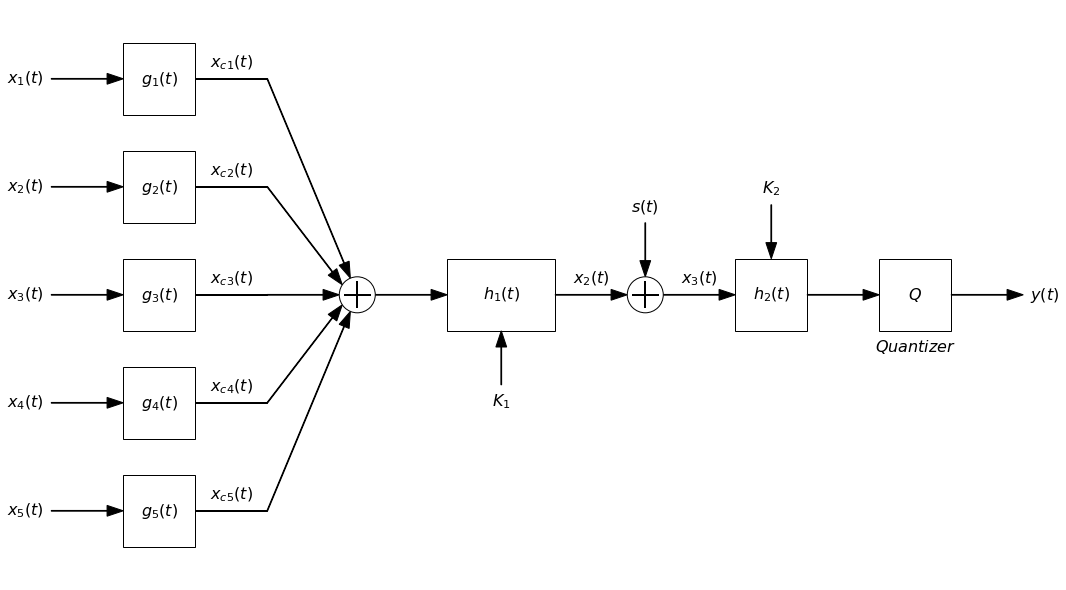

In [ ]:
from blockdiagrams import DiagramBuilder
import numpy as np

db = DiagramBuilder(block_length=1, fontsize=16)

y_pos = np.linspace(3, -3, 5)
x_pos = np.zeros_like(y_pos)
inputs_pos = np.column_stack((x_pos, y_pos))

input_threads = []

# Input branches
for cont in np.arange(inputs_pos.shape[0]):
    thread = "line" + str(cont + 1)
    input_threads.append(thread)

    name = "x_" + str(cont + 1) +"(t)"
    db.add(name, kind="arrow", thread = thread, text_position='before',position=(inputs_pos[cont]))
    name =  "g_" + str(cont + 1) +"(t)"
    db.add(name, kind="block", thread = thread)
    name = "x_{c" + str(cont + 1) + "}(t)"
    db.add(name, kind="line", thread = thread)

# Adder
db.add("x_{sum}(t)", kind="mult_combiner", inputs=input_threads, 
       position='auto', operation='sum')

# Rest of the diagram
db.add("h_1(t)", kind="block", input_text="K_1", input_side='bottom', length=1.5)
db.add("x_2(t)", kind="arrow")
db.add("mult", kind="combiner", input_text="s(t)", operation='sum', input_side='top')
db.add("x_3(t)", kind="arrow")
db.add("h_2(t)", kind="block", input_text="K_2", input_side='top')
db.add("", kind="arrow")
db.add("Q", kind="block", text_below='Quantizer')
db.add("y(t)", kind="arrow", text_position='after')

db.show(savepath = "diag3.png")

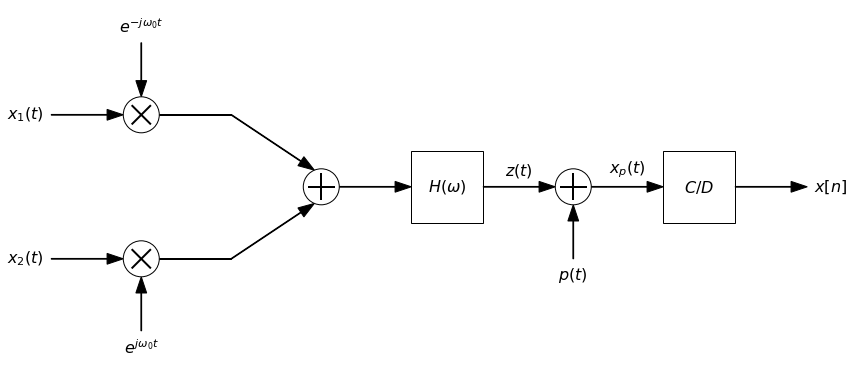

In [ ]:
from blockdiagrams import DiagramBuilder
import numpy as np

db = DiagramBuilder(block_length=1, fontsize=16)

db.add("x_1(t)", kind="input", thread='upper', position=(0, 1))
db.add("mult", kind="combiner", thread='upper', input_text="e^{-j\\omega_0 t}", input_side='top', operation='mult')
db.add("", kind="line", thread='upper')

db.add("x_2(t)", kind="input", thread='lower', position=(0, -1))
db.add("mult", kind="combiner", input_text="e^{j\\omega_0 t}", input_side='bottom', operation='mult', thread='lower')
db.add("", kind="line", thread='lower')


input_threads = ['upper', 'lower']

# Adder
db.add("", kind="mult_combiner", inputs=input_threads, position="auto", operation='sum')

# Rest of the diagram
db.add("H(\\omega)", kind="block")
db.add("z(t)", kind="arrow")
db.add("mult", kind="combiner", input_text="p(t)", input_side = 'bottom', operation='sum')
db.add("x_p(t)", kind="arrow")
db.add("C/D", kind="block")
db.add("x[n]", kind="output")

db.show()

Saved in: block_2_branches.png


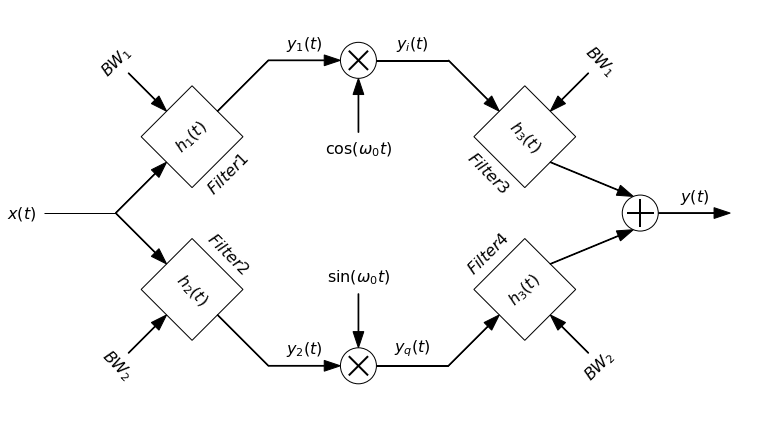

In [ ]:
from blockdiagrams import DiagramBuilder

db = DiagramBuilder(block_length=1, fontsize=16)

angle = 45

db.add("x(t)", kind="line", text_position='before', thread='upper')
pos1 = db.get_position(thread='upper')

db.add("", kind="arrow", orientation=angle, length = 1, thread='upper')
db.add("h_1(t)", kind="block", orientation=angle, text_below = "Filter1", input_text="BW_1", input_side='top', thread='upper')
db.add("", kind="line", orientation=angle, text_position='above', thread='upper')
db.add("y_1(t)", kind="arrow", text_position='above', thread='upper')
db.add("mult", kind="combiner",  input_text="\cos(\omega_0 t)", operation='mult', input_side='bottom', thread='upper')
db.add("y_i(t)", kind="line", text_position='above', thread='upper')
db.add("", kind="arrow", orientation=-angle, length = 1, thread='upper')
db.add("h_3(t)", kind="block", orientation=-angle, text_below = "Filter3", input_text="BW_1", input_side='top', thread='upper')

db.add("", kind="arrow", orientation=-angle, length = 1, thread='lower', position=pos1)
db.add("h_2(t)", kind="block", orientation=-angle, text_above = "Filter2", input_text="BW_2", input_side='bottom', thread='lower')
db.add("", kind="line", orientation=-angle, text_position='above', thread='lower')
db.add("y_2(t)", kind="arrow", text_position='above', thread='lower')
db.add("mult", kind="combiner",  input_text="\sin(\omega_0 t)", operation='mult', input_side='top', thread='lower')
db.add("y_q(t)", kind="line", text_position='above', thread='lower')
db.add("", kind="arrow", orientation=angle, length = 1, thread='lower')
db.add("h_3(t)", kind="block", orientation=angle, text_above = "Filter4", input_text="BW_2", input_side='bottom', thread='lower')

input_threads = ['upper', 'lower']
db.add("", kind="mult_combiner", inputs=input_threads, position="auto", operation='sum', output_text="y(t)")

db.show(savepath = "block_2_branches.png")

Saved in: block_angled.png


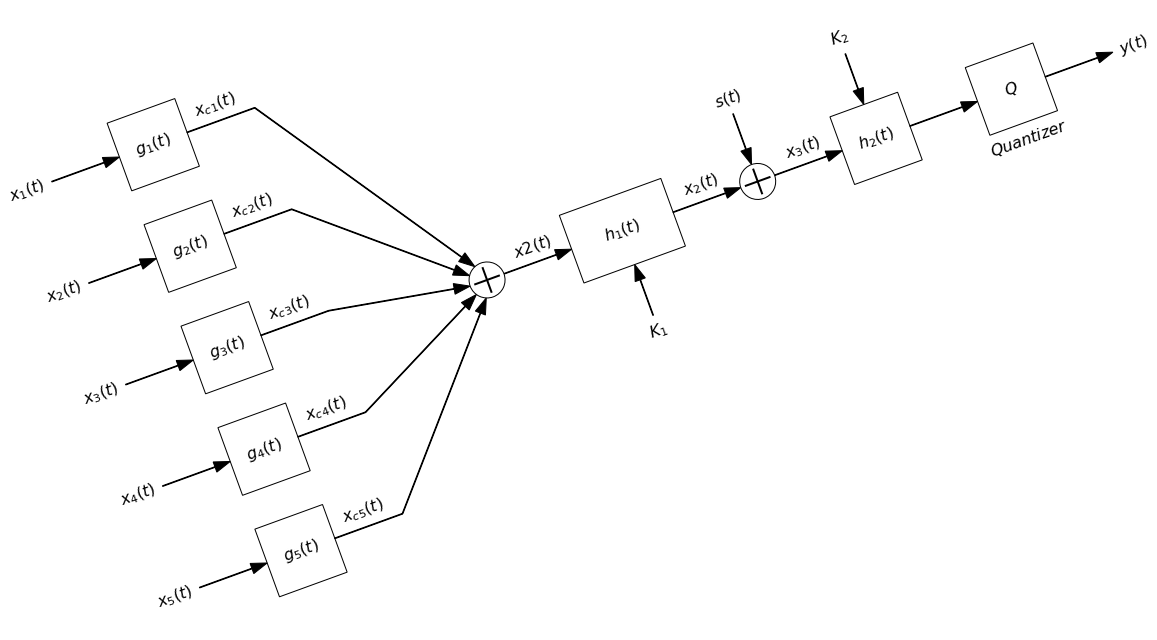

In [ ]:
from blockdiagrams import DiagramBuilder
import numpy as np
from matplotlib import transforms


db = DiagramBuilder(block_length=1, fontsize=16)

angle = 20
y_pos = np.linspace(3, -3, 5)
x_pos = np.zeros_like(y_pos)


inputs_pos = np.column_stack((x_pos, y_pos))

# Get rotation matrix
rot_matrix = transforms.Affine2D().rotate_deg(angle).get_matrix()[:2, :2]
inputs_pos = (rot_matrix @ inputs_pos.T).T

input_threads = []

# Input branches
for cont in np.arange(inputs_pos.shape[0]):
    thread = "line" + str(cont + 1)
    input_threads.append(thread)

    name = "x_" + str(cont + 1) +"(t)"
    db.add(name, kind="arrow", thread = thread, text_position='before',
           position=(inputs_pos[cont]), orientation = angle)
    name =  "g_" + str(cont + 1) +"(t)"
    db.add(name, kind="block", thread = thread, orientation = angle)
    name = "x_{c" + str(cont + 1) + "}(t)"
    db.add(name, kind="line", thread = thread, orientation = angle)

# Adder
db.add("x_{sum}(t)", kind="mult_combiner", output_text='x2(t)', inputs=input_threads, 
       position='auto', operation='sum', orientation=angle)

# Rest of the diagram
db.add("h_1(t)", kind="block", input_text="K_1", input_side='bottom', length=1.5, orientation = angle)
db.add("x_2(t)", kind="arrow", orientation = angle)
db.add("mult", kind="combiner", input_text="s(t)", operation='sum', input_side='top', orientation = angle)
db.add("x_3(t)", kind="arrow", orientation = angle)
db.add("h_2(t)", kind="block", input_text="K_2", input_side='top', orientation = angle)
db.add("", kind="arrow", orientation = angle)
db.add("Q", kind="block", text_below='Quantizer', orientation = angle)
db.add("y(t)", kind="arrow", text_position='after', orientation = angle)

db.show(savepath = "block_angled.png")

Saved in: block_vertical.png


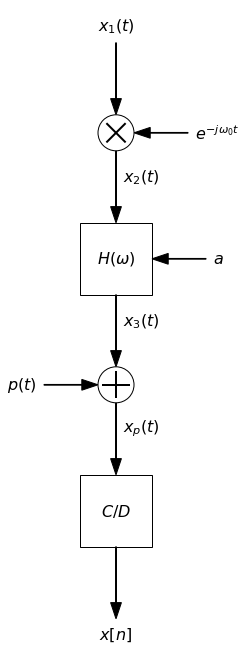

In [ ]:
from blockdiagrams import DiagramBuilder
import numpy as np

angle = 'vertical'

db = DiagramBuilder(block_length=1, fontsize=16)

db.add("x_1(t)", kind="input", position=(0, 1), orientation = angle)
db.add("mult", kind="combiner", input_text="e^{-j\\omega_0 t}", input_side='top', operation='mult', orientation = angle)
db.add("x_2(t)", kind="arrow", orientation = angle)
db.add("H(\\omega)", kind="block", input_side='top', input_text="a", orientation = angle)
db.add("x_3(t)", kind="arrow", orientation = angle)
db.add("mult", kind="combiner", input_text="p(t)", input_side = 'bottom', operation='sum', orientation = angle)
db.add("x_p(t)", kind="arrow", orientation = angle)
db.add("C/D", kind="block", orientation = angle)
db.add("x[n]", kind="output", orientation = angle)

db.show(savepath = "block_vertical.png")